Finding and plotting best points:
- Mask RCNN: Best Score = 45.3 at Zoom Factor = 2.00x (Tile Size ≈ 512)
- Mask2Former: Best Score = 44.6 at Zoom Factor = 2.00x (Tile Size ≈ 512)
- Mask DINO: Best Score = 46.5 at Zoom Factor = 2.00x (Tile Size ≈ 512)
Plot saved to /h/jquinto/tile-analysis.pdf


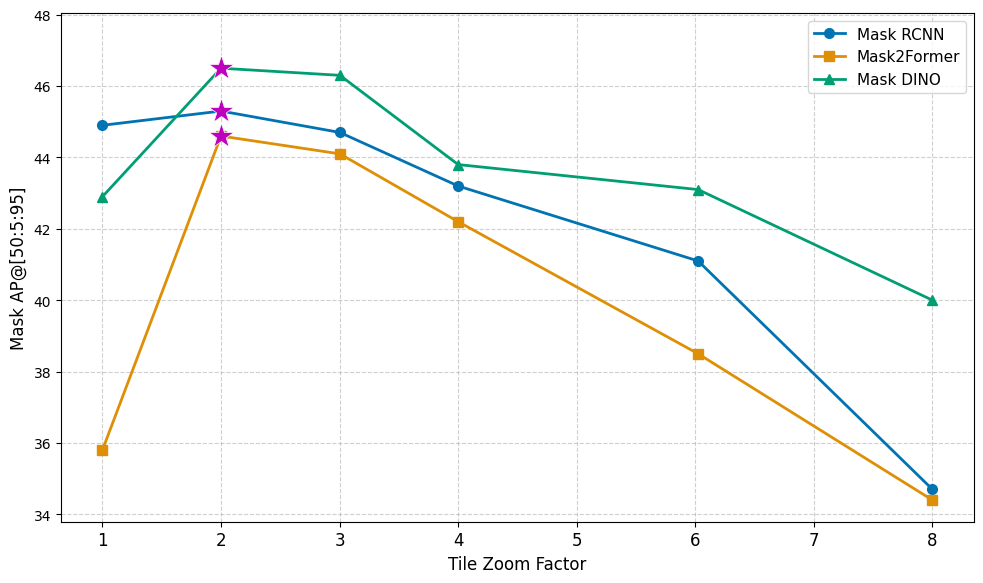


Summary of Best Performance:
- Mask RCNN: Peak AP 45.3 at 2.00x Zoom (Tile Size ≈ 512)
- Mask2Former: Peak AP 44.6 at 2.00x Zoom (Tile Size ≈ 512)
- Mask DINO: Peak AP 46.5 at 2.00x Zoom (Tile Size ≈ 512)


In [3]:
# ---------------------------------------------------------------------------
# Imports and Setup (Assume previous code block was executed or include these)
# ---------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Used for colorblind-friendly palette

# Configure Matplotlib font size (optional, adjust as needed)
plt.rcParams.update({'font.size': 12})

# --- Data Setup ---
# Tile sizes as provided in the first table
tile_sizes = [1024, 512, 341, 256, 170, 128]

# AP@[.5:.95] scores for the relevant models, ordered corresponding to tile_sizes
model_data = {
    # Scores extracted from the first table provided
    "Mask RCNN":   [44.9, 45.3, 44.7, 43.2, 41.1, 34.7],
    "Mask2Former": [35.8, 44.6, 44.1, 42.2, 38.5, 34.4],
    "Mask DINO":   [42.9, 46.5, 46.3, 43.8, 43.1, 40.0]
}

# Models we want to plot
models_to_plot = ["Mask RCNN", "Mask2Former", "Mask DINO"]

# --- Calculate Zoom Factors ---
# Zoom factor relative to the largest tile size (1024)
# Zoom = Base Size / Current Size
base_size = 1024
zoom_factors = [base_size / ts for ts in tile_sizes]

# Approximate labels for ticks if needed (optional, can use actual values too)
zoom_labels = [f"{zf:.1f}x" for zf in zoom_factors]
# Or simpler labels, noting approximations
zoom_ticks_approx_label = ['1x', '2x', '3x', '4x', '6x', '8x']

# --- Plotting ---
plt.figure(figsize=(10, 6))

# Get a colorblind-friendly color palette from Seaborn
# Ensure we get enough distinct colors for the models we're plotting
colors = sns.color_palette('colorblind', n_colors=len(models_to_plot))

# Assign distinct markers
markers = ['o', 's', '^'] # Circle, Square, Triangle

# Dictionary to store best points for potential summary later
best_points = {}

print("Finding and plotting best points:")

# Plot data for each selected model
for i, model_name in enumerate(models_to_plot):
    if model_name in model_data:
        scores = np.array(model_data[model_name]) # Use numpy array for easier indexing
        zoom_factors_np = np.array(zoom_factors)

        # Plot the main line and markers
        plt.plot(zoom_factors_np, scores,
                 marker=markers[i % len(markers)], # Cycle through markers
                 linestyle='-',
                 color=colors[i],
                 label=model_name,
                 linewidth=2,
                 markersize=7,
                 zorder=2) # Keep lines above vertical lines/grid

        # --- Find and Emphasize Best Point ---
        # Find the index of the maximum score
        best_idx = np.argmax(scores)
        best_score = scores[best_idx]
        best_zoom = zoom_factors_np[best_idx]

        # Store best point info
        best_points[model_name] = {'zoom': best_zoom, 'score': best_score}
        print(f"- {model_name}: Best Score = {best_score:.1f} at Zoom Factor = {best_zoom:.2f}x (Tile Size ≈ {base_size/best_zoom:.0f})")

        # 1. Add a star marker at the maximum point
        plt.scatter(best_zoom, best_score,
                    marker='*',            # Star marker
                    s=350,                 # Size of the marker (adjust as needed)
                    color='m',       # Color matching the line
                    edgecolor='white',     # Black edge for better visibility
                    linewidth=0.5,
                    zorder=4)              # Ensure star is on top of everything

        # # 2. Add a vertical line from the max point down to the x-axis
        # # Get current y-axis limits to draw the line to the bottom
        # ymin, _ = plt.ylim() # Get the current minimum y-value of the plot axis
        # plt.vlines(x=best_zoom,            # X-coordinate for the vertical line
        #            ymin=ymin,              # Start y from the bottom of the plot
        #            ymax=best_score,        # End y at the max score
        #            color=colors[i],        # Match line color
        #            linestyle='--',         # Dashed line style
        #            linewidth=1.5,          # Line thickness
        #            alpha=0.8,              # Slight transparency
        #            zorder=1)               # Draw below the main line but above the grid

    else:
        print(f"Warning: Data for model '{model_name}' not found.")

# --- Customize Plot ---
plt.xlabel("Tile Zoom Factor", fontsize=12)
plt.ylabel("Mask AP@[50:5:95]", fontsize=12)
# plt.title("Effect of Tile Size (Zoom Factor) on Detector Performance", fontsize=14) # Title optional

# Set x-axis ticks to correspond to the calculated zoom factors
# plt.xticks(zoom_factors, labels=[f"{zf:.2f}" for zf in zoom_factors], fontsize=10)
plt.yticks(fontsize=10)

# Add a legend to identify the lines (Star markers won't be in the legend)
plt.legend(fontsize=11)

# Add grid lines for better readability, ensure they are behind vertical lines
plt.grid(True, linestyle='--', alpha=0.6, zorder=0.5)

# Set y-axis limits AFTER plotting, ensuring the vlines start from the visible bottom
# This prevents the vlines from starting below 0 if data doesn't go that low
# Add a small padding at the bottom if needed
current_ymin, current_ymax = plt.ylim()
# plt.ylim(bottom=0) # Or set a specific bottom like 0
plt.ylim(bottom=current_ymin, top=current_ymax * 1.02) # Ensure space for legend/stars

# Adjust layout to prevent labels overlapping
plt.tight_layout()

# Save the figure (adjust path as needed)
# Make sure the directory exists or use a valid path
save_path = '/h/jquinto/tile-analysis.pdf'
try:
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"Plot saved to {save_path}")
except Exception as e:
    print(f"Error saving plot: {e}")


# --- Show Plot ---
plt.show()

# --- Print Summary of Best Points ---
print("\nSummary of Best Performance:")
for model, data in best_points.items():
    print(f"- {model}: Peak AP {data['score']:.1f} at {data['zoom']:.2f}x Zoom (Tile Size ≈ {base_size/data['zoom']:.0f})")

### PR Curve

Loading annotations...
loading annotations into memory...
Done (t=0.12s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.10s)
creating index...
index created!
Initializing COCO evaluation...
Customizing evaluation parameters...
  Set params.maxDets to: [1000]
  Set params.areaRng to: [[0, 10000000000.0], [0, 144], [144, 1024], [1024, 10000000000.0]]
  Set params.areaRngLbl to: ['all', 'small', 'medium', 'large']
  Script will analyze results later for maxDets index: 0 (corresponds to 1000 dets)
  Script will analyze results later for area range label: 'all'
Running evaluation...
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=7.10s).
Accumulating evaluation results...
DONE (t=0.02s).
Summarizing results (Note: summary might show default labels unless modified)...
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.453
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.833
 Average Pre

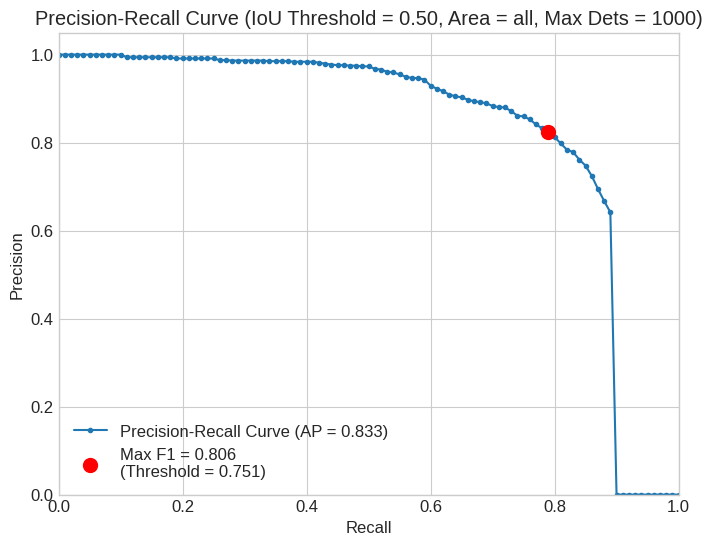

In [8]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import os

# --- Configuration ---
gt_annotation_file = '/h/jquinto/lifeplan_b_v9_cropped_center/annotations/instances_val2017_updated.json' # Ground truth COCO JSON

pred_annotation_file = "/h/jquinto/Mask-RCNN/runs/predict/exp_05_025_conf_lifeplan_b_512_sahi_tiled_keep_cutoff_v9_R50_one_cycle_5e-5_epoch_3_15k_iters/result.json"  # Your model's predictions in COCO JSON format
# pred_annotation_file = "/h/jquinto/MaskDINO/runs/predict/exp_05_025_conf_lifeplan_b_512_sahi_tiled_keep_cutoff_v9_R50_one_cycle_5e-5_epoch_3_15k_iters/result.json"
# pred_annotation_file = "/h/jquinto/Mask2Former/runs/predict/exp_05_025_conf_lifeplan_b_512_sahi_tiled_keep_cutoff_v9_R50_one_cycle_5e-5_epoch_4_15k_iters/result.json"

# pred_annotation_file = "/h/jquinto/MaskDINO/runs/predict/exp_05_025_conf_lifeplan_2x_zoom_SR_swinir_v9_R50_one_cycle_5e-5_epoch_4_15k_iters_orig_scale/result.json"
# pred_annotation_file = "/h/jquinto/Mask2Former/runs/predict/exp_05_025_conf_lifeplan_2x_zoom_SR_swinir_v9_R50_one_cycle_5e-5_epoch_4_15k_iters_orig_scale/result.json"
# pred_annotation_file = "/h/jquinto/Mask-RCNN/runs/predict/exp_05_025_conf_lifeplan_b_2x_zoom_SR_swinir_v9_R50_one_cycle_5e-5_epoch_3_15k_iters_orig_scale/result.json"

iou_type = 'segm'             # Type of evaluation ('segm' or 'bbox')
iou_threshold_for_plot = 0.50 # IoU threshold for which to plot the PR curve (e.g., 0.50 or 0.75)

# --- Parameters for RESULT EXTRACTION (after evaluation) ---
# These now need to align with the modified cocoEval.params below
area_range_label_to_analyze = 'all'      # Area range to PLOT ('all', 'small', 'medium', 'large')
max_dets_index_to_analyze = 0            # Index for max detections to PLOT (MUST BE 0 since we only evaluate for 1000)

output_plot_file = f"PR_curves_SR/precision_recall_curve_custom_params_MaskRCNN_SR_SwinIR_IoU_{iou_threshold_for_plot}.png" # File to save the plot
# --- End Configuration ---

# --- Helper Function to find index ---
def find_iou_index(coco_eval, iou_thr):
    """Finds the index corresponding to a specific IoU threshold."""
    for i, thr in enumerate(coco_eval.params.iouThrs):
        if abs(thr - iou_thr) < 1e-5:
            return i
    raise ValueError(f"IoU threshold {iou_thr} not found in params.iouThrs")

def find_area_index(coco_eval, area_lbl):
    """Finds the index corresponding to a specific area label."""
    # Ensure the label exists in the (potentially modified) areaRngLbl
    if area_lbl not in coco_eval.params.areaRngLbl:
         raise ValueError(f"Area label '{area_lbl}' not found in params.areaRngLbl: {coco_eval.params.areaRngLbl}")
    return coco_eval.params.areaRngLbl.index(area_lbl)

# --- Main Script ---
if not os.path.exists(gt_annotation_file):
    print(f"ERROR: Ground truth file not found at {gt_annotation_file}")
    exit()
if not os.path.exists(pred_annotation_file):
    print(f"ERROR: Prediction file not found at {pred_annotation_file}")
    exit()

# 1. Load Data
print("Loading annotations...")
cocoGt = COCO(gt_annotation_file)
cocoDt = cocoGt.loadRes(pred_annotation_file)
imgIds = sorted(cocoGt.getImgIds())

# 2. Initialize COCOeval
print("Initializing COCO evaluation...")
cocoEval = COCOeval(cocoGt, cocoDt, iou_type)

# --- === MODIFICATION START === ---
# 2.1 Customize Evaluation Parameters BEFORE running evaluate()
print("Customizing evaluation parameters...")

# Set max detections to 1000 only
cocoEval.params.maxDets = [1000]
print(f"  Set params.maxDets to: {cocoEval.params.maxDets}")

# Set custom area ranges (matches manuscript)
# Keep 'all', then define small < 144, medium 144-1024, large >= 1024
large_num_pixels = 1e5**2 # Use a large number for upper bound
cocoEval.params.areaRng = [
    [0**2, large_num_pixels],    # all (index 0)
    [0**2, 144],                # small (< 12^2) (index 1)
    [144, 1024],               # medium (12^2 to 32^2) (index 2)
    [1024, large_num_pixels]   # large (>= 32^2) (index 3)
]
# Keep labels the same, as they correspond conceptually
cocoEval.params.areaRngLbl = ['all', 'small', 'medium', 'large']
print(f"  Set params.areaRng to: {cocoEval.params.areaRng}")
print(f"  Set params.areaRngLbl to: {cocoEval.params.areaRngLbl}")

print(f"  Script will analyze results later for maxDets index: {max_dets_index_to_analyze} (corresponds to {cocoEval.params.maxDets[max_dets_index_to_analyze]} dets)")
print(f"  Script will analyze results later for area range label: '{area_range_label_to_analyze}'")
# --- === MODIFICATION END === ---


# 2.2 Run Evaluation with Modified Parameters
print("Running evaluation...")
cocoEval.evaluate() # Uses the modified params.maxDets and params.areaRng
cocoEval.accumulate() # Accumulates results based on the evaluation run

print("Summarizing results (Note: summary might show default labels unless modified)...")
# The summarize() function itself might have hardcoded labels/values
# It's best to rely on the direct extraction below for your specific curve.
cocoEval.summarize_2() # Prints standard AP/AR summary based on accumulated eval

# 3. Extract Precision, Recall, and Scores for the desired plot parameters
print(f"\nExtracting data for IoU={iou_threshold_for_plot}, area='{area_range_label_to_analyze}', maxDets={cocoEval.params.maxDets[max_dets_index_to_analyze]}...")
if not cocoEval.eval:
    print("ERROR: Accumulate must be run first.")
    exit()

# Get indices for specific settings FOR PLOTTING
iou_idx = find_iou_index(cocoEval, iou_threshold_for_plot)
area_idx = find_area_index(cocoEval, area_range_label_to_analyze)
max_dets_idx = max_dets_index_to_analyze # MUST be 0 now

# Precision has shape [T, R, K, A, M]
# T = # IoU thresholds (10)
# R = # Recall thresholds (101)
# K = # Categories (use 1 if evaluating class-agnostic, otherwise len(catIds))
# A = # Area ranges (NOW 4 CUSTOM RANGES)
# M = # Max detections thresholds (NOW JUST 1: 1000)

# Assuming class-agnostic or single category evaluation (K=1 or averaging over K)
if cocoEval.params.useCats and len(cocoEval.params.catIds) > 1:
    # Average precision across all categories for the selected settings
    precision_values = cocoEval.eval['precision'][iou_idx, :, :, area_idx, max_dets_idx]
    precision = np.mean(precision_values[:, precision_values[0,:] > -1], axis=1) # Average over K where category is present
    scores = np.mean(cocoEval.eval['scores'][iou_idx, :, :, area_idx, max_dets_idx][:, precision_values[0,:] > -1], axis=1)
else:
    # Use the first category index (k=0) - suitable for single class or useCats=0
    precision = cocoEval.eval['precision'][iou_idx, :, 0, area_idx, max_dets_idx]
    scores = cocoEval.eval['scores'][iou_idx, :, 0, area_idx, max_dets_idx]


recall_thresholds = cocoEval.params.recThrs

# Filter out points where precision is -1 (meaning no data for that recall level)
valid_indices = precision > -1
valid_precision = precision[valid_indices]
valid_recall = recall_thresholds[valid_indices]
valid_scores = scores[valid_indices] # Confidence scores corresponding to these points

if len(valid_precision) == 0:
    print(f"ERROR: No valid data points found for IoU={iou_threshold_for_plot}, area='{area_range_label_to_analyze}', maxDets={cocoEval.params.maxDets[max_dets_idx]}. Cannot generate plot.")
    exit()

# 4. Calculate F1 Scores (No change needed here)
f1_scores = np.zeros_like(valid_precision)
valid_pr_sum = valid_precision + valid_recall
non_zero_mask = valid_pr_sum > 0
f1_scores[non_zero_mask] = 2 * (valid_precision[non_zero_mask] * valid_recall[non_zero_mask]) / valid_pr_sum[non_zero_mask]

# 5. Find Max F1 Score and corresponding threshold (No change needed here)
max_f1_index = np.argmax(f1_scores)
max_f1 = f1_scores[max_f1_index]
max_f1_precision = valid_precision[max_f1_index]
max_f1_recall = valid_recall[max_f1_index]
max_f1_score_threshold = valid_scores[max_f1_index]

print(f"\nMaximum F1 Score ({max_f1:.3f}) achieved at:")
print(f"  Precision: {max_f1_precision:.3f}")
print(f"  Recall:    {max_f1_recall:.3f}")
print(f"  Confidence Threshold approx.: {max_f1_score_threshold:.3f}")

# --- Extract the relevant AP score ---
# The cocoEval.stats array is populated by summarize().
# Its indices correspond to specific combinations of default settings.
# Since we changed the settings, directly using cocoEval.stats indices might be incorrect
# or map to the wrong calculation if summarize() wasn't also modified.
# It's safer to calculate the AP for the specific plotted curve directly:
ap_for_plot = np.mean(valid_precision) # Mean of precision values over the valid recall steps
print(f"Average Precision (AP) for this curve (IoU={iou_threshold_for_plot:.2f}, area='{area_range_label_to_analyze}', maxDets={cocoEval.params.maxDets[max_dets_idx]}): {ap_for_plot:.3f}")


# 6. Plot the PR Curve (Use the calculated AP)
print("Generating plot...")
plt.figure(figsize=(8, 6))
# Use the directly calculated AP for the label
plt.plot(valid_recall, valid_precision, marker='.', label=f'Precision-Recall Curve (AP = {ap_for_plot:.3f})')
plt.scatter(max_f1_recall, max_f1_precision, color='red', s=100, label=f'Max F1 = {max_f1:.3f}\n(Threshold = {max_f1_score_threshold:.3f})', zorder=5)

# Add labels and title
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f'Precision-Recall Curve (IoU Threshold = {iou_threshold_for_plot:.2f}, Area = {area_range_label_to_analyze}, Max Dets = {cocoEval.params.maxDets[max_dets_idx]})') # Added Area/MaxDets
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.legend(loc='lower left')

# Save the plot
plt.savefig(output_plot_file)
print(f"Plot saved to {output_plot_file}")
# plt.show() # Uncomment to display the plot directly

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import os

# Okabe-Ito colorblind-friendly palette (Hex codes)
okabe_ito_colors = [
    "#E69F00", # Orange
    "#56B4E9", # Sky Blue
    "#009E73", # Bluish Green
    "#CC79A7", # Reddish Purple
    "#F0E442", # Yellow
    "#0072B2", # Blue
    "#D55E00", # Vermilion
    "#000000"  # Black (use as last resort or for emphasis)
]


# --- Your existing generate_pr_curve function (no changes needed inside here from previous version) ---
def generate_pr_curve(gt_annotation_file, pred_annotation_file, model_name, color, ax, # Added model_name, color, ax
                      iou_type='segm', iou_threshold_for_plot=0.5,
                      area_range_label_to_analyze='all', max_dets_index_to_analyze=0):
    print(f"\n--- Processing: {model_name} ---")
    # --- Helper Function to find index ---
    def find_iou_index(coco_eval, iou_thr):
        for i, thr in enumerate(coco_eval.params.iouThrs):
            if abs(thr - iou_thr) < 1e-5:
                return i
        raise ValueError(f"IoU threshold {iou_thr} not found in params.iouThrs: {coco_eval.params.iouThrs}")

    def find_area_index(coco_eval, area_lbl):
        if area_lbl not in coco_eval.params.areaRngLbl:
            # Fallback if label not found but maybe the range exists
            target_range = None
            if area_lbl == 'all': target_range = [0**2, 1e5**2]
            elif area_lbl == 'small': target_range = [0**2, 144]
            elif area_lbl == 'medium': target_range = [144, 1024]
            elif area_lbl == 'large': target_range = [1024, 1e5**2]

            if target_range:
                for i, rng in enumerate(coco_eval.params.areaRng):
                    # Compare ranges with tolerance for float precision if necessary
                     if np.allclose(rng, target_range):
                        print(f"Warning: Area label '{area_lbl}' not found in params.areaRngLbl. Found matching range at index {i}.")
                        # Optionally update the label list if desired, but returning index is sufficient
                        # coco_eval.params.areaRngLbl[i] = area_lbl
                        return i
            raise ValueError(f"Area label '{area_lbl}' not found in params.areaRngLbl: {coco_eval.params.areaRngLbl}. Available ranges: {coco_eval.params.areaRng}")
        return coco_eval.params.areaRngLbl.index(area_lbl)


    # --- Main Script ---
    if not os.path.exists(gt_annotation_file):
        print(f"ERROR: Ground truth file not found at {gt_annotation_file}")
        return None # Return None on error
    if not os.path.exists(pred_annotation_file):
        print(f"ERROR: Prediction file not found at {pred_annotation_file} for model {model_name}")
        return None # Return None on error

    # 1. Load Data
    print("Loading annotations...")
    try:
        cocoGt = COCO(gt_annotation_file)
        cocoDt = cocoGt.loadRes(pred_annotation_file)
    except Exception as e:
        print(f"ERROR loading COCO annotations for {model_name}: {e}")
        return None

    imgIds = sorted(cocoGt.getImgIds())
    if not imgIds and len(cocoDt.anns) == 0:
        print(f"Warning: No image IDs found in GT and no annotations in prediction file: {pred_annotation_file} for {model_name}. Cannot evaluate.")
        return None
    elif not imgIds:
        print(f"Warning: No image IDs found in ground truth file: {gt_annotation_file}. Evaluation might be empty.")

    if len(cocoDt.anns) == 0:
        print(f"Warning: No annotations found in prediction file: {pred_annotation_file} for {model_name}. Plotting P=0.")
        ax.plot([0, 1], [0, 0], marker='', linestyle='--', linewidth=1.5, color=color, label=f'{model_name}: No Detections')
        return None # Return None as evaluation didn't happen


    # 2. Initialize COCOeval
    print("Initializing COCO evaluation...")
    cocoEval = COCOeval(cocoGt, cocoDt, iou_type)

    # 2.1 Customize Evaluation Parameters
    print("Customizing evaluation parameters...")
    original_max_dets = cocoEval.params.maxDets # Store original if needed later
    cocoEval.params.maxDets = [1000] # Evaluate *only* for 1000 max detections
    print(f"  Set params.maxDets to: {cocoEval.params.maxDets}")

    large_num_pixels = 1e5**2
    # Use the area ranges expected by the find_area_index helper
    expected_area_rng = [
        [0**2, large_num_pixels], [0**2, 144], [144, 1024], [1024, large_num_pixels]
    ]
    expected_area_rng_lbl = ['all', 'small', 'medium', 'large']

    # Sync params if they differ from expected defaults COCOeval might load
    if not np.allclose(cocoEval.params.areaRng, expected_area_rng):
        print(f"  Updating params.areaRng to: {expected_area_rng}")
        cocoEval.params.areaRng = expected_area_rng
    if cocoEval.params.areaRngLbl != expected_area_rng_lbl:
         print(f"  Updating params.areaRngLbl to: {expected_area_rng_lbl}")
         cocoEval.params.areaRngLbl = expected_area_rng_lbl

    # Validate area_range_label_to_analyze before evaluation
    try:
        _ = find_area_index(cocoEval, area_range_label_to_analyze)
    except ValueError as e:
        print(f"ERROR: {e}. Cannot proceed with evaluation.")
        return None

    print(f"  Script will analyze results later for maxDets index: {max_dets_index_to_analyze} (corresponds to {cocoEval.params.maxDets[max_dets_index_to_analyze]} dets)")
    print(f"  Script will analyze results later for area range label: '{area_range_label_to_analyze}'")

    # 2.2 Run Evaluation
    print("Running evaluation...")
    try:
        cocoEval.evaluate()
        cocoEval.accumulate()
    except Exception as e:
        print(f"ERROR during COCO evaluation for {model_name}: {e}")
        # Add more debug info if needed
        # print(f"  Image IDs used: {cocoEval.params.imgIds}")
        # print(f"  Category IDs used: {cocoEval.params.catIds}")
        return None


    # 3. Extract Precision, Recall, and Scores
    print(f"Extracting data for IoU={iou_threshold_for_plot}, area='{area_range_label_to_analyze}', maxDets={cocoEval.params.maxDets[max_dets_index_to_analyze]}...")
    if not cocoEval.eval or 'precision' not in cocoEval.eval or cocoEval.eval['precision'] is None:
        print(f"ERROR: Evaluation data ('precision') not available for {model_name}. Accumulate might have failed or produced no results.")
        return None

    # Get indices
    try:
        iou_idx = find_iou_index(cocoEval, iou_threshold_for_plot)
        area_idx = find_area_index(cocoEval, area_range_label_to_analyze)
        # max_dets_idx is fixed based on params.maxDets = [1000] now
        if max_dets_index_to_analyze >= len(cocoEval.params.maxDets):
             print(f"ERROR: max_dets_index_to_analyze ({max_dets_index_to_analyze}) is out of bounds for current params.maxDets ({cocoEval.params.maxDets}). Setting to 0.")
             max_dets_idx = 0
        else:
            max_dets_idx = max_dets_index_to_analyze

    except ValueError as e:
        print(f"ERROR finding indices for {model_name}: {e}")
        return None

    precision_all_cats = cocoEval.eval['precision']
    scores_all_cats = cocoEval.eval['scores'] # Confidence scores

    T_dim, R_dim, K_dim, A_dim, M_dim = precision_all_cats.shape
    if not (0 <= iou_idx < T_dim and 0 <= area_idx < A_dim and 0 <= max_dets_idx < M_dim):
        print(f"ERROR: Calculated indices are out of bounds for precision array shape {precision_all_cats.shape}. ")
        print(f"  Indices: iou={iou_idx}, area={area_idx}, max_dets={max_dets_idx}")
        return None

    num_categories = K_dim
    if num_categories > 1 and cocoEval.params.useCats: # Check useCats param
        print(f"  Detected {num_categories} categories and useCats=True. Averaging precision across categories.")
        precision_values_k = precision_all_cats[iou_idx, :, :, area_idx, max_dets_idx] # Shape (R, K)
        scores_values_k = scores_all_cats[iou_idx, :, :, area_idx, max_dets_idx]       # Shape (R, K)

        precision = np.zeros(R_dim) # Shape (R,)
        scores = np.zeros(R_dim)       # Shape (R,)

        for r in range(R_dim): # Iterate through recall steps
            valid_k_mask = precision_values_k[r, :] > -1
            if np.any(valid_k_mask):
                precision[r] = np.mean(precision_values_k[r, valid_k_mask])
                # Average scores corresponding to valid precision points
                # Check if scores array also needs masking for validity if scores can be -1
                scores_valid_k = scores_values_k[r, valid_k_mask]
                scores[r] = np.mean(scores_valid_k[scores_valid_k > -1]) if np.any(scores_valid_k > -1) else -1
            else:
                precision[r] = -1 # Mark as invalid if no category had data for this recall
                scores[r] = -1 # Mark scores as invalid too

    elif num_categories >= 1:
         if num_categories > 1:
             print(f"  Detected {num_categories} categories but useCats=False or averaging disabled. Using first category (index 0).")
         else:
             print("  Detected 1 category.")
         # Use the first category index (k=0)
         precision = precision_all_cats[iou_idx, :, 0, area_idx, max_dets_idx] # Shape (R,)
         scores = scores_all_cats[iou_idx, :, 0, area_idx, max_dets_idx]       # Shape (R,)
    else:
        print(f"ERROR: Precision array has invalid category dimension K={num_categories}")
        return None


    recall_thresholds = cocoEval.params.recThrs # Shape (R,) = (101,)

    valid_indices = precision > -1
    if not np.any(valid_indices):
         print(f"ERROR: No valid precision points found for {model_name} at IoU={iou_threshold_for_plot}, area='{area_range_label_to_analyze}', maxDets={cocoEval.params.maxDets[max_dets_idx]}. Cannot plot curve.")
         # Optionally plot a line at P=0 or just skip
         ax.plot([0, 1], [0, 0], marker='', linestyle='--', linewidth=1.5, color=color, label=f'{model_name}: No Valid Data')
         return None # Skip plotting this curve

    valid_precision = precision[valid_indices]
    valid_recall = recall_thresholds[valid_indices]
    valid_scores = scores[valid_indices] # Confidence scores corresponding to these points

    # 4. Calculate F1 Scores
    f1_scores = np.zeros_like(valid_precision)
    valid_pr_sum = valid_precision + valid_recall
    non_zero_mask = valid_pr_sum > 0
    f1_scores[non_zero_mask] = 2 * (valid_precision[non_zero_mask] * valid_recall[non_zero_mask]) / valid_pr_sum[non_zero_mask]

    # 5. Find Max F1 Score and corresponding threshold
    if len(f1_scores) == 0:
        print(f"Warning: No valid F1 scores could be calculated for {model_name}.")
        max_f1, max_f1_precision, max_f1_recall, max_f1_score_threshold = 0, 0, 0, np.nan
        max_f1_index = -1 # Indicate no valid max F1 point
    else:
        max_f1_index = np.argmax(f1_scores)
        max_f1 = f1_scores[max_f1_index]
        max_f1_precision = valid_precision[max_f1_index]
        max_f1_recall = valid_recall[max_f1_index]
        if max_f1_index < len(valid_scores):
             max_f1_score_threshold = valid_scores[max_f1_index]
        else:
             print(f"Warning: Index mismatch finding threshold for Max F1 ({model_name}). Threshold N/A.")
             max_f1_score_threshold = np.nan # Use NaN for missing threshold

    print(f"  Maximum F1 Score: {max_f1:.3f}")
    print(f"    Precision: {max_f1_precision:.3f}, Recall: {max_f1_recall:.3f}")
    print(f"    Approx. Confidence Threshold: {max_f1_score_threshold:.3f}")

    ap_for_plot = np.mean(valid_precision) # Mean of precision values over the valid recall steps
    print(f"  Average Precision (AP) for this curve: {ap_for_plot:.3f}")

    # 6. Plot on the provided axes (ax)
    print("Plotting curve...")
    # Format threshold, handle NaN
    thr_str = f"{max_f1_score_threshold:.2f}" if not np.isnan(max_f1_score_threshold) else "N/A"
    legend_label = f'{model_name}: Max F1={max_f1:.2f} (Conf={thr_str})'

    ax.plot(valid_recall, valid_precision, marker='.', markersize=5, linestyle='-', linewidth=1.5,
            label=legend_label, color=color)

    if max_f1_index != -1: # Only plot if a valid max F1 point was found
        ax.scatter(max_f1_recall, max_f1_precision, color=color, s=100, zorder=5, marker='o', edgecolors='black')

    print(f"--- Finished processing: {model_name} ---")
    return cocoEval # Return eval object



--- Processing: Mask R-CNN ---
Loading annotations...
loading annotations into memory...
Done (t=0.12s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Initializing COCO evaluation...
Customizing evaluation parameters...
  Set params.maxDets to: [1000]
  Updating params.areaRng to: [[0, 10000000000.0], [0, 144], [144, 1024], [1024, 10000000000.0]]
  Script will analyze results later for maxDets index: 0 (corresponds to 1000 dets)
  Script will analyze results later for area range label: 'all'
Running evaluation...
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=6.76s).
Accumulating evaluation results...
DONE (t=0.02s).
Extracting data for IoU=0.5, area='all', maxDets=1000...
  Detected 1 category.
  Maximum F1 Score: 0.806
    Precision: 0.823, Recall: 0.790
    Approx. Confidence Threshold: 0.751
  Average Precision (AP) for this curve: 0.833
Plotting curve...
--- Finished processing: Mask R-CNN

/tmp/ipykernel_23841/2585711941.py:85: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(False, which='both', linestyle='--', linewidth=0.5) # Customize grid



Combined plot saved to combined_pr_curve_iou_0.50_okabe_ito.pdf


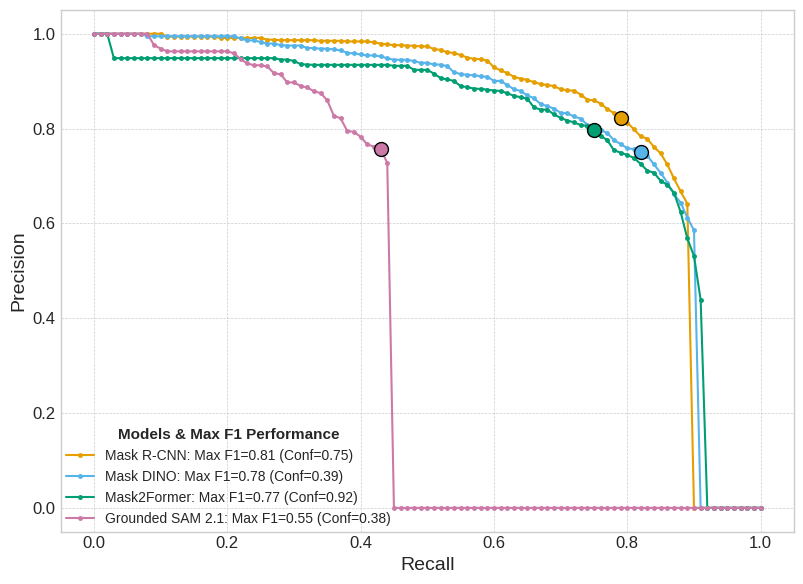

In [2]:
# --- Configuration ---
gt_annotation_file = '/h/jquinto/lifeplan_b_v9_cropped_center/annotations/instances_val2017_updated.json' # Ground truth COCO JSON
pred_annotation_files = [
    "/h/jquinto/Mask-RCNN/runs/predict/exp_05_025_conf_lifeplan_b_512_sahi_tiled_keep_cutoff_v9_R50_one_cycle_5e-5_epoch_3_15k_iters/result.json",
    "/h/jquinto/MaskDINO/runs/predict/exp_05_025_conf_lifeplan_b_512_sahi_tiled_keep_cutoff_v9_R50_one_cycle_5e-5_epoch_3_15k_iters/result.json",
    "/h/jquinto/Mask2Former/runs/predict/exp_05_025_conf_lifeplan_b_512_sahi_tiled_keep_cutoff_v9_R50_one_cycle_5e-5_epoch_4_15k_iters/result.json",
    "/h/jquinto/Grounded-SAM-2/runs/predict/exp_05_025_conf_grounded_sam2_zero_shot_512_tiled_0.6_overlap_insect_alt_obj_fcn/result.json",
]
# Define corresponding model names
model_names = [
    "Mask R-CNN",
    "Mask DINO",
    "Mask2Former",
    "Grounded SAM 2.1"
]

iou_type = 'segm'
iou_threshold_for_plot = 0.50
area_range_label_to_analyze = 'all'
max_dets_index_to_analyze = 0 # Corresponds to the single entry in modified params.maxDets

output_plot_file = f"combined_pr_curve_iou_{iou_threshold_for_plot:.2f}_okabe_ito.pdf"

# --- Plotting Setup ---
# plt.style.use('seaborn-v0_8-darkgrid') # Keep style or choose another
plt.style.use('seaborn-v0_8-whitegrid') # White grid background might be cleaner
plt.rcParams.update({'font.size': 12, 'figure.facecolor': 'white'})

# *** ADJUST FIGURE SIZE FOR BETTER ASPECT RATIO ***
fig, ax = plt.subplots(1, 1, figsize=(10, 6)) # Wider figure (e.g., 11 inches wide, 7 inches tall)

# Use Okabe-Ito colors defined earlier
colors_to_use = okabe_ito_colors

last_coco_eval = None

# --- Generate Curves ---
for i, model_name in enumerate(model_names):
    pred_file = pred_annotation_files[i]
    if not pred_file:
        print(f"Skipping {model_name}: Prediction file path not found.")
        continue

    if i >= len(colors_to_use):
        print(f"Warning: Not enough distinct colors defined ({len(colors_to_use)}). Reusing colors for model: {model_name}")
        color = colors_to_use[i % len(colors_to_use)] # Cycle through colors
    else:
        color = colors_to_use[i]

    # Call the modified function only if pycocotools is available
    coco_eval_result = generate_pr_curve(
        gt_annotation_file=gt_annotation_file,
        pred_annotation_file=pred_file,
        model_name=model_name,
        color=color,
        ax=ax,
        iou_type=iou_type,
        iou_threshold_for_plot=iou_threshold_for_plot,
        area_range_label_to_analyze=area_range_label_to_analyze,
        max_dets_index_to_analyze=max_dets_index_to_analyze
    )
    if coco_eval_result:
        last_coco_eval = coco_eval_result # Store the last successful one


# --- Final Plot Adjustments ---
plot_title = f'Precision-Recall Curve (IoU = {iou_threshold_for_plot:.2f})'
max_dets_value = 3000 # Default if no eval succeeded
if last_coco_eval and last_coco_eval.params.maxDets:
     try:
         max_dets_value = last_coco_eval.params.maxDets[max_dets_index_to_analyze]
         plot_title = f'Precision-Recall Curve (IoU={iou_threshold_for_plot:.2f}, Area={area_range_label_to_analyze}, Max Dets={max_dets_value})'
     except (IndexError, AttributeError): # Catch potential errors accessing params
         print(f"Warning: Could not get maxDets value from last cocoEval object.")
         plot_title += f' (Area={area_range_label_to_analyze}, Max Dets=Unknown)'
else:
     print(f"Warning: No successful COCOeval object available to confirm plot parameters.")
     plot_title += f' (Area={area_range_label_to_analyze}, Max Dets={max_dets_value})'

ax.set_xlabel("Recall", fontsize=14)
ax.set_ylabel("Precision", fontsize=14)
# ax.set_title(plot_title, fontsize=16, pad=15) # Add padding to title
# ax.set_xlim([0.0, 1.05])
# ax.set_ylim([0.0, 1.05])
ax.grid(False, which='both', linestyle='--', linewidth=0.5) # Customize grid

# Place legend outside the plot area
# Adjust bbox_to_anchor x-value if needed based on the new figure size
# Adjust rect in tight_layout if legend gets clipped
legend = ax.legend(title="Models & Max F1 Performance", loc='lower left', borderaxespad=0., fontsize=10, title_fontsize=11)
legend.get_title().set_fontweight('bold')

# Adjust layout - try without rect first, then adjust if needed
# fig.tight_layout() # This might automatically adjust space
# If tight_layout() cuts off the legend, use rect:
fig.tight_layout(rect=[0, 0, 0.82, 1]) # Adjust right margin (0.82) as needed

# Save the final plot
if output_plot_file:
    try:
        plt.savefig(output_plot_file, bbox_inches='tight', dpi=150) # Save with tight bounding box, higher DPI
        print(f"\nCombined plot saved to {output_plot_file}")
    except Exception as e:
        print(f"\nError saving plot: {e}")

# Display the plot
plt.show()